In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


/home/cedcoss/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

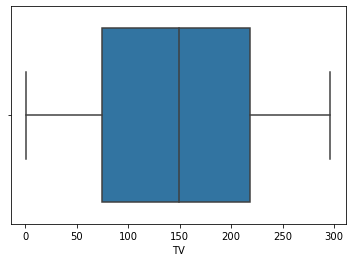

In [6]:
sns.boxplot(df['TV'])

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

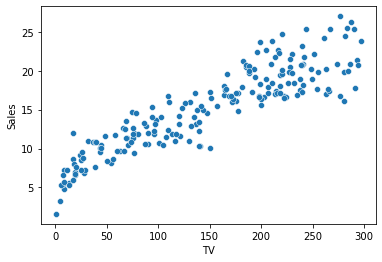

In [8]:
sns.scatterplot(x="TV",y="Sales",data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

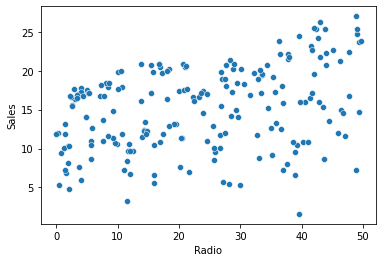

In [9]:
sns.scatterplot(x="Radio",y="Sales",data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

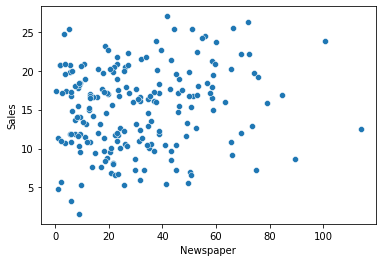

In [10]:
sns.scatterplot(x="Newspaper",y="Sales",data=df)

In [11]:
x=df[["TV","Radio","Newspaper"]]
y=df[["Sales"]]

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
reg=linear_model.LinearRegression()

In [14]:
reg.fit(X_train,Y_train)

LinearRegression()

In [15]:
print(reg.coef_)

[[0.05365017 0.11073062 0.00203697]]


In [16]:
predictions = reg.predict(X_test)

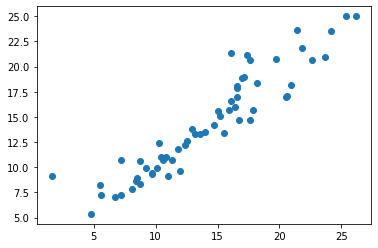

In [17]:
plt.scatter(Y_test,predictions)

In [18]:
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, predictions))))

MAE: 1.3662313868452756
MSE: 3.9380152204802843
RMSE: 1.9844433024100951


/home/cedcoss/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

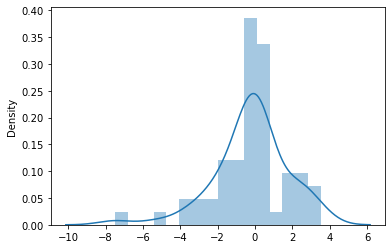

In [19]:
sns.distplot((Y_test-predictions))